## In this notebook, we're going to cover some of the most fundamental concepts of tensors using Tensorflow

More Specifically, we're going to cover:
* Introduction to tensors
* Getting infromation from tensors
* Manipulating Tensors
* Tensors & numpy
* Using @tf.function (a way to speed  up your regular python functions)

* using GPUs with Tensorflow (OR TPUs)
* Exercises to try for yourself.

### Introduction to Tensors

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# Creating tensors with tf.constant()
scalar = tf.constant(6)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [ ]:
# Check the number of dimensions of a tensor  (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
# create a matrix
matrix = tf.constant([[10,7],
                      [10,7]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [10,  7]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                                [3., 2.],
                                [8., 9.]], dtype = tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
# let's create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,2,3,]],
                      [[32,3,2],
                       [1,3,23]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10,  2,  3]],

       [[32,  3,  2],
        [ 1,  3, 23]]], dtype=int32)>

In [ ]:
tensor.ndim

3

what we've created so far
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2 dim array of number
* Tensor: a n-dimensional array of numbers (where n can be any number)

In [ ]:
# Create the same tensor as tf.Variable() as above
changable_tensor = tf.Variable([10,7])
unchangable_tensor = tf.constant([10,7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try change one of teh elements of our changeable tensor
# changable_tensor[0] = 7 give ans error
changable_tensor[0].assign(7)
changable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#Let's try to change unchangable tensor
# unchangable_tensor[0].assign(7) as expected can't change

#### Creating random Tensors

Random tensors  are tensors wof some abitary size which contain random number

In [ ]:
# Create two random (but the same tensors)
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape = (3,2)) # output random values for a normal distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape =(3,2))

In [ ]:
random_1, random_2, random_1==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## Shuffle the order of elements in random Tensors

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect your learning)
not_shuffled = tf.constant([[10,7],
                            [34,2],
                            [56,54]])


#shuffled our non-shuffled tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled,seed=4) # shuffle in order of first dimension

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[56, 54],
       [10,  7],
       [34,  2]], dtype=int32)>

### Exersice - Create 5 random tensors

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed

> Rule 4: "if both the global and the operation seed are set: Both seed are used in conjuction to determiune the random sequence

In [ ]:
t1 = tf.random.Generator.from_seed(32)
t1 = t1.normal(shape = (3,2))
#let's shuffle it
tf.random.shuffle(t1,seed = 2)
t1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.7901182,  1.585549 ],
       [ 0.4356279,  0.2364518],
       [-0.1589871,  1.302304 ]], dtype=float32)>

In [ ]:
t2 = tf.random.Generator.from_seed(25)
t2 = t2.normal(shape = (10,10))
#let's shuffle it
tf.random.shuffle(t2)
t2

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[-0.14371012, -0.34646833,  1.1456194 , -0.416     ,  0.43369916,
         1.0241015 , -0.74785167, -0.59090924, -1.2060374 ,  0.8307429 ],
       [ 1.0951619 ,  1.3672234 , -0.54532146,  1.9302735 , -0.3151453 ,
        -0.8761205 , -2.7316678 , -0.15730922,  1.3692921 , -0.4367834 ],
       [ 0.8357487 ,  0.20849545,  1.4040174 , -2.735283  ,  1.2232229 ,
        -1.8653691 ,  0.00511209, -1.0493753 ,  0.7901182 ,  1.585549  ],
       [ 0.4356279 ,  0.2364518 , -0.1589871 ,  1.302304  ,  0.9592239 ,
         0.85874265, -1.5181769 ,  1.4020647 ,  1.5570306 , -0.96762174],
       [ 0.495291  , -0.648484  , -1.8700892 ,  2.7830641 , -0.645002  ,
         0.18022095, -0.14656258,  0.34374258,  0.41367555,  0.17573498],
       [-1.0871261 ,  0.45905176,  0.20386009,  0.562024  , -2.3001142 ,
        -1.349454  ,  0.81485   ,  1.2790666 ,  0.02203509,  1.5428121 ],
       [ 0.78953624,  0.53897345, -0.48535708,  0.74055266,  0.31662

In [ ]:
t3 = tf.random.Generator.from_seed(45)
t3 = t3.normal(shape = (2,2))
print(t3)
#let's shuffle it
tf.random.set_seed(32)
tf.random.shuffle(t3,seed=25)
t3

tf.Tensor(
[[-0.3522796   0.40621263]
 [-1.0523509   1.2054597 ]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.3522796 ,  0.40621263],
       [-1.0523509 ,  1.2054597 ]], dtype=float32)>

In [ ]:
tf.random.set_seed(52) # this will set the global seed
tf.random.shuffle(t2,seed=42) # Gives different order each time if only this

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[-0.3522796 ,  0.40621263, -1.0523509 ,  1.2054597 ,  1.6874489 ,
        -0.4462975 , -2.3410842 ,  0.99009085, -0.0876323 , -0.635568  ],
       [ 0.78953624,  0.53897345, -0.48535708,  0.74055266,  0.31662667,
        -1.4391748 ,  0.58923835, -1.4268045 , -0.7565803 , -0.06854702],
       [-1.0871261 ,  0.45905176,  0.20386009,  0.562024  , -2.3001142 ,
        -1.349454  ,  0.81485   ,  1.2790666 ,  0.02203509,  1.5428121 ],
       [-0.14371012, -0.34646833,  1.1456194 , -0.416     ,  0.43369916,
         1.0241015 , -0.74785167, -0.59090924, -1.2060374 ,  0.8307429 ],
       [ 0.07595026, -1.2573844 , -0.23193763, -1.8107855 ,  0.09988727,
        -0.50998646, -0.7535805 , -0.57166284,  0.1480774 , -0.23362993],
       [ 1.0951619 ,  1.3672234 , -0.54532146,  1.9302735 , -0.3151453 ,
        -0.8761205 , -2.7316678 , -0.15730922,  1.3692921 , -0.4367834 ],
       [ 0.4356279 ,  0.2364518 , -0.1589871 ,  1.302304  ,  0.95922

#### Other ways to make tensors

In [ ]:
# Create a tensor of all ones
tf.ones([10,6])

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Create a tensor of all zeros
tf.zeros([10,3])

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

#### Turn numpy array into tensors

The main difference between between Numpy array and Tensorflow Tensors is that tensors can be run on a GPU (much faster for numerical computing)

In [ ]:
import numpy as np
tf.constant(np.ones([3,2]))

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]])>

In [ ]:
numpy_A = np.arange(1,25,dtype=np.int32) # Create a numpy array between 1,25
print(tf.constant(numpy_A))
numpy_A = numpy_A.reshape((2,3,4))
print(tf.constant(numpy_A))

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,), dtype=int32)
tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)


## Getting information from tensors

* Shape - `tensor.shape`
* Rank - `tensor.ndim`
* Axis or dimension  - `tensor[0],tensor[:,1]`
* size - `tf.size(tensor)`

In [ ]:
# Create a rank 4 tensor
rank_4_tensor = tf.zeros([2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various Attribute of our tensor
print("Datatype of every element: ",rank_4_tensor.dtype)
print("Number of dimension (rank): ",rank_4_tensor.ndim)
print("Shape of tensor: ",rank_4_tensor.shape)
print("Element along the 0 axis: ",rank_4_tensor.shape[0])
print("Element along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor with numpy: ",tf.size(rank_4_tensor).numpy())
print("Total number of elements in our tensor: ",tf.size(rank_4_tensor))

Datatype of every element:  <dtype: 'float32'>
Number of dimension (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Element along the 0 axis:  2
Element along the last axis:  5
Total number of elements in our tensor with numpy:  120
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)


### Indexing Tensors

Tensors can be indexed just like python list

In [ ]:
# Get the first 2 element of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:,:1,:1,:1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [ ]:
# Create a rank 2 tensor
rank_2_tensor = tf.constant([[10,4],
                             [32,2]])
rank_2_tensor.shape,rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
# get last item of each of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 2], dtype=int32)>

In [ ]:
# Add in extra dimension to rank 2 tensor
rank_3_tensor = rank_2_tensor[... , tf.newaxis] # [:,:,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 4]],

       [[32],
        [ 2]]], dtype=int32)>

In [ ]:
rank_3_tensor.shape

TensorShape([2, 2, 1])

In [ ]:
tf.expand_dims(rank_2_tensor,axis = -1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 4]],

       [[32],
        [ 2]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor,axis = 0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  4],
        [32,  2]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor,axis = 1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  4]],

       [[32,  2]]], dtype=int32)>

### Manipulating Tensors (tensor operations)

**Basic operation**

+, - , * , /

In [ ]:
# You can add values to a tensor using Addition operator

tensor = tf.constant([[10,43],[32,1]])
tensor+10 # original is same as before

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 53],
       [42, 11]], dtype=int32)>

In [ ]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, 33],
       [22, -9]], dtype=int32)>

In [ ]:
tensor *10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 430],
       [320,  10]], dtype=int32)>

In [ ]:
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 4.3],
       [3.2, 0.1]])>

TF built in function

In [ ]:
tf.add(tensor , 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 53],
       [42, 11]], dtype=int32)>

In [ ]:
tf.multiply(tensor , 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 430],
       [320,  10]], dtype=int32)>

In [ ]:
tensor1 = tf.constant([[10,102],[123,12]])
tf.multiply(tensor, tensor1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 100, 4386],
       [3936,   12]], dtype=int32)>

In [ ]:
tf.divide(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 4.3],
       [3.2, 0.1]])>

In [ ]:
tf.subtract(tensor, 12)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ -2,  31],
       [ 20, -11]], dtype=int32)>

#### Matrix multiplication

In [ ]:
# Matrix multiplication in tensorflow
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1476,  473],
       [ 352, 1377]], dtype=int32)>

In [ ]:
# Matrix multiplication with python operator "@ "
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1476,  473],
       [ 352, 1377]], dtype=int32)>

#### tf.reshape

In [ ]:
X = tf.constant([[10,10],
 [10,21],
 [32,12]])
y = tf.constant([[20,120],
                 [32,123],
                 [32,23]])
# X @ y # it is going to be incompatable
tf.reshape(X,shape=(2,3)),y

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10, 10, 10],
        [21, 32, 12]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 20, 120],
        [ 32, 123],
        [ 32,  23]], dtype=int32)>)

In [ ]:
tf.reshape(X,shape = (2,3)) @ y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 840, 2660],
       [1828, 6732]], dtype=int32)>

In [ ]:
# Can do the same thing with transpose in this case
tf.transpose(X),y

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10, 10, 32],
        [10, 21, 12]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 20, 120],
        [ 32, 123],
        [ 32,  23]], dtype=int32)>)

In [ ]:
tf.transpose(X) @ y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1544, 3166],
       [1256, 4059]], dtype=int32)>

In [ ]:
X , tf.transpose(X)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10, 10],
        [10, 21],
        [32, 12]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10, 10, 32],
        [10, 21, 12]], dtype=int32)>)

**The dot product**

matrix multiplication is also reffered to as the dot product.

you can perform matrix multiplication using:

* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
# perform the dot product on X and y (require the X or Y to be transpose)
tf.tensordot(tf.transpose(X),y,axes = 1) # here the result is same as tf.tranpose(X) @ y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1544, 3166],
       [1256, 4059]], dtype=int32)>

In [ ]:
tf.matmul(X,tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1400, 1550,  550],
       [2720, 2903,  803],
       [2080, 2500, 1300]], dtype=int32)>

In [ ]:
tf.matmul(X, tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1430, 1520,  550],
       [2783, 1872,  803],
       [2116, 4224, 1300]], dtype=int32)>

In [ ]:
# check the values of y, reshape y and transpose y
print("Normal y: ")
print(y, '\n') # \n is for newline

print("y reshape to (2,3): ")
print(tf.reshape(y,shape = (2,3)), "\n")

print("y transpose: ")
print(tf.transpose(y))

Normal y: 
tf.Tensor(
[[ 20 120]
 [ 32 123]
 [ 32  23]], shape=(3, 2), dtype=int32) 

y reshape to (2,3): 
tf.Tensor(
[[ 20 120  32]
 [123  32  23]], shape=(2, 3), dtype=int32) 

y transpose: 
tf.Tensor(
[[ 20  32  32]
 [120 123  23]], shape=(2, 3), dtype=int32)


Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will tranpose rather than reshape to one of the tensor to satisfy matrix multiplication

### Changing the datatype of the tensor

In [ ]:
# Create a new tensor with default datatype
B  = tf.constant([1.3,2.3])
B.dtype

tf.float32

In [ ]:
C  = tf.constant([3,21])
C.dtype

tf.int32

In [ ]:
# Change form float32 to float16
D  = tf.cast(B, dtype = tf.float16)
D, D.dtype, B.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.3, 2.3], dtype=float16)>,
 tf.float16,
 tf.float32)

In [ ]:
# change from int32 to float32
E = tf.cast(C,dtype = tf.float32)
E.dtype, C.dtype, E

(tf.float32,
 tf.int32,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 21.], dtype=float32)>)

In [ ]:
E_float16 = tf.cast(E,dtype = tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 3., 21.], dtype=float16)>

### Tensor aggregation

Agregating tensors = condensing them from multiple value down to a smaller amount of values.

In [ ]:
# Get the absolute value
D = tf.constant([-7,-10])
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's got through the following form of aggregations
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
R = tf.constant([[2,3],
                 [8,2]])
R

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [8, 2]], dtype=int32)>

In [ ]:
# Minimum
tf.reduce_min(R)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
#maximum
tf.reduce_max(R)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
# Mean value
tf.reduce_mean(R)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
# Sum value
tf.reduce_sum(R)

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
# variance
tf.math.reduce_variance(tf.cast(R, dtype = tf.float32)) # require float values

<tf.Tensor: shape=(), dtype=float32, numpy=6.1875>

In [ ]:
# Standard deviation
tf.math.reduce_std(tf.cast(R,dtype  = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=2.4874685>

### Find the positional maximum and minimum

In [ ]:
#Positional min
tf.argmin(R)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>

In [ ]:
# positional max
tf.argmax(R)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>

### Squeezing a tensor (removing all single dimensions)

reduce tensor of single dimension

In [ ]:
# create a tensor
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape = [50]),shape = (1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### OneHotEncoding

In [ ]:
# Create a list of indices
some_list = [0,1,2,3]

# one hot encode our list of indices
tf.one_hot(some_list,depth=10)

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Create a list of indices
some_list = [0,1,2,3]
# one hot encode our list of indices
tf.one_hot(some_list,depth=4,on_value = "yo i love deep learning", off_value = "i also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo i love deep learning', b'i also like to dance',
        b'i also like to dance', b'i also like to dance'],
       [b'i also like to dance', b'yo i love deep learning',
        b'i also like to dance', b'i also like to dance'],
       [b'i also like to dance', b'i also like to dance',
        b'yo i love deep learning', b'i also like to dance'],
       [b'i also like to dance', b'i also like to dance',
        b'i also like to dance', b'yo i love deep learning']],
      dtype=object)>

### squaring, log , sqrt

In [ ]:
# Create new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
tf.square(H) # square

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
tf.sqrt(tf.cast(H, dtype=tf.float32)) # square root

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
tf.math.log(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

Tensorflow intract beautifly with numpy array

In [ ]:
J = tf.constant(np.array([23,32,231,123]))
J

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 23,  32, 231, 123])>

In [ ]:
np.array(J), type(np.array(J))

(array([ 23,  32, 231, 123]), numpy.ndarray)

In [ ]:
# convert tensor J to numpy array
J.numpy(), type(J.numpy())

(array([ 23,  32, 231, 123]), numpy.ndarray)

In [ ]:
J = tf.constant([3.0])
J.numpy()[0]

3.0

In [ ]:
# The deafault type of each are slightly different
numpy_J = tf.constant(np.array([3.,32.,32])) # default type is tf.float64
tensor_J = tf.constant([3.,32.,32.])
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### finding access to GPUs

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### TensorFlow fundamental Exercise

In [ ]:
# Create a vector, scalar, matrix and tensor with values of your choosing using `tf.constant().`
scalar = tf.constant(32)
vector = tf.constant([32,23])
matrix = tf.constant([[32,32],
                      [323,23]])
scalar.ndim, vector.ndim, matrix.ndim

(0, 1, 2)

In [ ]:
# Find the shape, rank and size of the tensors you created in 1.

print(f"Shapes: scalar {scalar.shape}, Vector {vector.shape}, matrix {matrix.shape}")
print(f"Rank: scalar {scalar.ndim}, Vector {vector.ndim}, matrix {matrix.ndim}")
print(f"Size: scalar {tf.size(scalar)}, Vector {tf.size(vector)}, matrix {tf.size(matrix)}")

Shapes: scalar (), Vector (2,), matrix (2, 2)
Rank: scalar 0, Vector 1, matrix 2
Size: scalar 1, Vector 2, matrix 4


In [ ]:
# Create two tensors containing random values between 0 and 1 with shape [5, 300].
tf.random.set_seed(42)
tensor1 = tf.random.uniform(shape = [5,300])
tensor2 = tf.random.uniform(shape = [5,300])


In [ ]:
# Multiply the two tensors you created in 3 using matrix multiplication.
tf.matmul(tf.transpose(tensor1),tensor2)

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[1.317161  , 0.61993605, 1.2612379 , ..., 1.5290778 , 1.0735596 ,
        1.6227092 ],
       [1.0170685 , 0.42642498, 0.8181824 , ..., 1.1469344 , 0.8212255 ,
        1.1739546 ],
       [0.45034647, 0.8037954 , 1.4656199 , ..., 1.105671  , 0.88152766,
        1.481925  ],
       ...,
       [1.3204696 , 1.1634867 , 1.7423928 , ..., 1.8386563 , 1.5207756 ,
        1.5979093 ],
       [0.73207504, 0.90400356, 1.8493464 , ..., 1.3821819 , 0.98218614,
        1.924531  ],
       [1.0814031 , 0.5316744 , 0.7174167 , ..., 1.2942287 , 1.0804075 ,
        1.0476992 ]], dtype=float32)>

In [ ]:
# Multiply the two tensors you created in 3 using dot product.
tf.tensordot(tf.transpose(tensor1),tensor2,axes = 1)

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[1.317161  , 0.61993605, 1.2612379 , ..., 1.5290778 , 1.0735596 ,
        1.6227092 ],
       [1.0170685 , 0.42642498, 0.8181824 , ..., 1.1469344 , 0.8212255 ,
        1.1739546 ],
       [0.45034647, 0.8037954 , 1.4656199 , ..., 1.105671  , 0.88152766,
        1.481925  ],
       ...,
       [1.3204696 , 1.1634867 , 1.7423928 , ..., 1.8386563 , 1.5207756 ,
        1.5979093 ],
       [0.73207504, 0.90400356, 1.8493464 , ..., 1.3821819 , 0.98218614,
        1.924531  ],
       [1.0814031 , 0.5316744 , 0.7174167 , ..., 1.2942287 , 1.0804075 ,
        1.0476992 ]], dtype=float32)>

In [ ]:
# Create a tensor with random values between 0 and 1 with shape [224, 224, 3].
tf.random.set_seed(42)
tensor_random_0_1 = tf.random.uniform(shape = [224, 224, 3])
tensor_random_0_1.shape

TensorShape([224, 224, 3])

In [ ]:
# Find the min and max values of the tensor you created in 6 along the first axis.
tf.reduce_max(tensor_random_0_1), tf.reduce_min(tensor_random_0_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.999998>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.5762787e-07>)

In [ ]:
tf.random.set_seed(42)
tensor_random = tf.random.uniform(shape = [1,224,224,3])
tensor_random.shape

TensorShape([1, 224, 224, 3])

In [ ]:
# Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3].
tf.squeeze(tensor_random).shape

TensorShape([224, 224, 3])

In [ ]:
# Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.
some_tensor = tf.range(1,11)
some_tensor, tf.argmax(some_tensor)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
# One-hot encode the tensor you created in 9.
tf.one_hot(some_tensor.numpy(),depth = 11)

<tf.Tensor: shape=(10, 11), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

## Tensorflow quick start for beginners

In [ ]:
# setup tensorflow
import tensorflow as tf
print("Tensorflow version : ", tf.__version__)

Tensorflow version :  2.12.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


((28, 28), (60000, 28, 28))

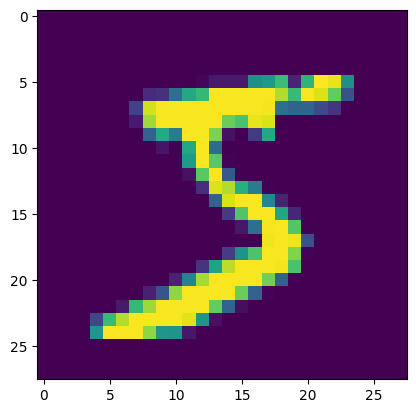

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]);
x_train[0].shape, x_train.shape

In [ ]:
# Building machine learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
# for each example, the model return a vector of logits and log-odds scores, one for each class
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.20102352,  0.67425424,  0.20823428,  0.3238408 , -0.10268094,
         0.10210702,  0.12532519, -1.0776341 , -0.12940551, -0.20467576]],
      dtype=float32)

In [ ]:
# tf.nn.softmax function convert these logits to probabilities of each class
tf.nn.softmax(predictions).numpy(), np.argmax(tf.nn.softmax(predictions))

(array([[0.0773659 , 0.18564269, 0.11648981, 0.13076611, 0.08536094,
         0.10476047, 0.10722129, 0.032199  , 0.08310992, 0.07708385]],
       dtype=float32),
 1)

In [ ]:
# Define a loss function for training using losses.SparseCategoricalCrossentropy

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
# this untrained model gives probabilities close to random (1/10 for each class). so the initial loss should be close to -tf.math.log(1/10) ~= 2.3
loss_fn(y_train[:1], predictions).numpy()

2.2560787

In [ ]:
# compile the model
model.compile(optimizer = 'adam',
              loss = loss_fn ,
              metrics = ['accuracy'])

In [ ]:
# Train the model using model.fit
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2923 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1419 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1066 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0876 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9762


In [ ]:
model.evaluate(x_test,y_test,verbose = 2)

313/313 - 1s - loss: 0.0742 - accuracy: 0.9769 - 1s/epoch - 3ms/step


[0.07421941310167313, 0.9768999814987183]

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.3196688e-08, 2.6322888e-09, 3.7632676e-06, 5.6229026e-05,
        4.8289449e-11, 4.1452969e-07, 1.0398644e-11, 9.9993420e-01,
        2.9965796e-07, 5.1097873e-06],
       [6.8051594e-07, 1.7246371e-05, 9.9997616e-01, 1.6571680e-07,
        3.0853749e-16, 1.7643346e-06, 3.7216098e-06, 2.4250308e-15,
        1.8537007e-07, 1.9062634e-14],
       [1.0960960e-06, 9.9261546e-01, 1.2532175e-03, 4.6434383e-05,
        6.1464547e-05, 9.6387248e-06, 2.2943301e-05, 5.4491898e-03,
        5.3684082e-04, 3.6748156e-06],
       [9.9951088e-01, 9.3495389e-09, 2.2026125e-04, 4.7470003e-08,
        1.2074725e-05, 1.1134227e-06, 1.9544628e-04, 6.4144833e-06,
        2.1607864e-08, 5.3755521e-05],
       [4.1721582e-06, 2.9273778e-08, 3.8847109e-05, 6.2977222e-08,
        9.9382329e-01, 6.8624792e-07, 4.4110579e-06, 9.1491129e-05,
        7.3121141e-06, 6.0297372e-03]], dtype=float32)>

In [ ]:
results = np.argmax(probability_model(x_test[:5]),axis = 1)

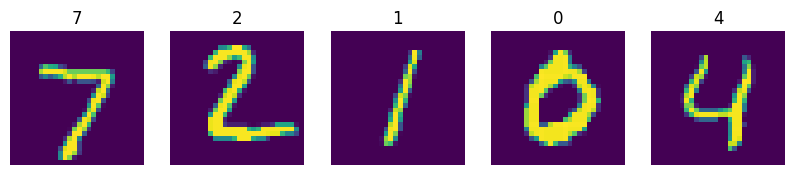

In [ ]:
plt.figure(figsize= (10,10))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(x_test[i-1])
  plt.title(results[i-1])
  plt.axis('off')
plt.show()

# Restart

# In this notebook, we're going to cover some of the most fundamental concepts of tensors using Tensorflow

More specifically, we're going to cover
* Introduction to tensors
* Getting information from tensors
* manipulating tensors
* Tensors & numpy
* using @tf.function (a way to speed up your regular Python function)
* Exercise to try to yourself

## Introduction to Tensors

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# Creating Tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor (ndim stands for number of dimnesions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check its dimensions
vector.ndim

1

In [6]:
# Create a matrix
matrix = tf.constant([[10, 9],
                      [3,2]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  9],
       [ 3,  2]], dtype=int32)>

In [7]:
matrix.ndim

2

In [8]:
matrix.shape

TensorShape([2, 2])

In [9]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [3.,23.]], dtype = tf.float16)

In [10]:
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 3., 23.]], dtype=float16)>

In [11]:
# what is number of dimension
another_matrix.ndim

2

In [12]:
# Let's create a tensor
tensor = tf.constant([[[1,2,3],
                       [3,2,2]],
                      [[3,2,3],
                       [3,2,3]]])
tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [3, 2, 2]],

       [[3, 2, 3],
        [3, 2, 3]]], dtype=int32)>

In [13]:
tensor.ndim

3

### All of them are tensors

What we've created so far:

* scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* matrix: a 2-dimensional array of numbers
* Tensor: an n-dimnesional array of numbers (when n can be any number, a 0-dim is scalar, 1-dim is vector)

### Creating tensors with `tf.variable()`

In [14]:
# Create the same tensor with tf.Vriable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 9])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  9], dtype=int32)>)

In [15]:
# Can we change the element in our changable tensor
# changeable_tensor[0]  = 7 Throught this we can't assign it
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

**It changed**

In [16]:
# let's try to change our unchangeable tensor
# unchangeable_tensor[0].assign(7) This is also not allowed if we use tf.constant()


* means we use `tf.constant()` then we can't change the values of tensor it's like constant variable

* If we use `tf.Variable()` then we can change the values just like list using `.assign(<value>)`

🔑 Rarely in practice will you need to decide whether to use `tf.constant()` or `tf.Variable()` to create tensors, as Tensorflow does this for you. However, if in doubt, use `tf.constant()` and change it later if needed.

## Create random tensor

Random tensors are tensors of some abitary size filled with random numbers

In [17]:
random_tensor = tf.random.uniform((2,3,4)) # betweeen 0 and 1 using uniform distribution
random_tensor

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0.82169807, 0.03211176, 0.6304997 , 0.19362378],
        [0.06027079, 0.607453  , 0.88539934, 0.48094785],
        [0.3340944 , 0.8966801 , 0.8417684 , 0.80080557]],

       [[0.9247849 , 0.782256  , 0.6607797 , 0.9312712 ],
        [0.7246622 , 0.67847633, 0.4141035 , 0.12486732],
        [0.7149663 , 0.58189976, 0.7197236 , 0.61713624]]], dtype=float32)>

In [18]:
# Create 2 random but same tensor
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducability
random_1 = random_1.normal(shape = (3,2)) # from Normal Distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape = (3,2))


# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

They are random but same due to `random.Generator.from_seed(<seed)` so they are like pseudo random numbers single the seed is set

### Shuffle the order of elements in tensor

In [19]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
tf.random.set_seed(42) # can also be used to set seed
not_shuffled = tf.random.normal((3, 2))
not_shuffled, not_shuffled.ndim

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.3274685, -0.8426258],
        [ 0.3194337, -1.4075519],
        [-2.3880599, -1.0392479]], dtype=float32)>,
 2)

In [20]:
# Shuffle our non shuffle tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42) # shuffled in first dimension means row wise

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.3274685, -0.8426258],
       [ 0.3194337, -1.4075519],
       [-2.3880599, -1.0392479]], dtype=float32)>

There are Two types of set seed in Tensorflow

* Global level seed
* Operation level seed

In [21]:
tf.random.set_seed(42) # Global level seed
tf.random.shuffle(not_shuffled, seed = 42) # operation level seed

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.3274685, -0.8426258],
       [ 0.3194337, -1.4075519],
       [-2.3880599, -1.0392479]], dtype=float32)>

Its looks like if we want our shuffled tensors to be in same order, we've got to use the global level random seed as well as operation level random seed

### Other ways to make tensors

In [22]:
import numpy as np
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [23]:
# just like this we can use tf.ones()
tf.ones((10, 4)) # Create a tensor of all ones

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [24]:
tf.zeros((10, 4)) # create tensors of all zeroes

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [25]:
tf.ones([3,4]) # use can also use [] instead of ()

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

### Turn Numpy arrays into tensors

the main difference betweeen Numpy arays and tensors is that Tensors can be run on GPU (much much faster for numerical computing)

In [26]:
# you can also turn numpy array into tensors

numpy_A = np.arange(1,25, dtype=np.int32) # Create a numpy array between 1 to 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [27]:
# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

A = tf.constant(numpy_A, shape = (2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

### Getting information from tensors

* Shape `tensor.shape`
* Rank `tensor.ndim`
* Axis or dimensions `tensor[0]`, `tensor[:,1]`
* size `tf.size(tensor)`

In [28]:
rank_4_tensor = tf.zeros((2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [29]:
print("Shape: ", rank_4_tensor.shape)
print("Rank: ", rank_4_tensor.ndim)
print("Axis or dimension", rank_4_tensor[0], rank_4_tensor[:,1])
print("Size: ", tf.size(rank_4_tensor))

Shape:  (2, 3, 4, 5)
Rank:  4
Axis or dimension tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 4, 5), dtype=float32) tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(2, 4, 5), dtype=float32)
Size:  tf.Tensor(120, shape=(), dtype=int32)


In [30]:
2*3*4*5

120

In [31]:
# Get various attributes of our tensor
print("Datatypes of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank)", rank_4_tensor.ndim)
print("shape of tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis", rank_4_tensor.shape[0])
print("Element along last axis", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor).numpy())

Datatypes of every element:  <dtype: 'float32'>
Number of dimensions (rank) 4
shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis 2
Element along last axis 5
Total number of elements in our tensor:  120


### Indexing on tensors

Tensors can be indexed just like python list

In [32]:
# Get the first 2 elements of each dimensions
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [33]:
# get first element from each dimension from each index except for the final one
rank_4_tensor[:1,:1,:, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [34]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 3],
                             [3,23]])
rank_2_tensor, rank_2_tensor.ndim

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  3],
        [ 3, 23]], dtype=int32)>,
 2)

In [35]:
rank_2_tensor[-1, :]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 3, 23], dtype=int32)>

### in two ways we can increase or change the dimension of our tensor

In [36]:
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # ... every axis before last one
rank_3_tensor # In numpy tf.newaxis is None

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 3]],

       [[ 3],
        [23]]], dtype=int32)>

In [37]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis = -1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 3]],

       [[ 3],
        [23]]], dtype=int32)>

In [38]:
tf.expand_dims(rank_2_tensor, axis = 1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  3]],

       [[ 3, 23]]], dtype=int32)>

### Manipulating tensors (tensor operations)

In [39]:
# You can add values to the tensor using the addition operator
tensor = tf.constant([[10,8], [3,3]], dtype = tf.float32)
tensor+10 # add 10 to every element
# while original is unchanged

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[20., 18.],
       [13., 13.]], dtype=float32)>

In [40]:
# Multiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[100.,  80.],
       [ 30.,  30.]], dtype=float32)>

In [41]:
# Substraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0., -2.],
       [-7., -7.]], dtype=float32)>

In [42]:
# we can use the tensorflow build-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[100.,  80.],
       [ 30.,  30.]], dtype=float32)>

In [43]:
tf.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[20., 18.],
       [13., 13.]], dtype=float32)>

In [44]:
another_tensor = tf.random.uniform((2,3))
another_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 ],
       [0.46448255, 0.03366041, 0.68467236]], dtype=float32)>

In [45]:
tf.matmul(tensor, another_tensor)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[10.361482 ,  4.679351 ,  9.006204 ],
       [ 3.387134 ,  1.4240016,  3.1126647]], dtype=float32)>

In [46]:
tensor * tensor # it will form element wise multiplication

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[100.,  64.],
       [  9.,   9.]], dtype=float32)>

In [47]:
tf.matmul(tensor, tensor) # this is dot product of 2 matrix

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[124., 104.],
       [ 39.,  33.]], dtype=float32)>

### `tf.reshape()`

In [48]:
tf.reshape(another_tensor, (3,2)) # previously it was (2,3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.6645621 , 0.44100678],
       [0.3528825 , 0.46448255],
       [0.03366041, 0.68467236]], dtype=float32)>

In [49]:
another_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 ],
       [0.46448255, 0.03366041, 0.68467236]], dtype=float32)>

### can do the same with `tf.transpose()`

In [50]:
tf.transpose(another_tensor) # preform regular matrix tranpose

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.6645621 , 0.46448255],
       [0.44100678, 0.03366041],
       [0.3528825 , 0.68467236]], dtype=float32)>

**The dot product** `tf.tensordot()`

In [51]:
tf.tensordot(tensor, another_tensor, axes = 0)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=float32, numpy=
array([[[[6.6456213 , 4.4100676 , 3.528825  ],
         [4.6448255 , 0.33660412, 6.8467236 ]],

        [[5.316497  , 3.5280542 , 2.82306   ],
         [3.7158604 , 0.2692833 , 5.477379  ]]],


       [[[1.9936863 , 1.3230203 , 1.0586475 ],
         [1.3934476 , 0.10098124, 2.054017  ]],

        [[1.9936863 , 1.3230203 , 1.0586475 ],
         [1.3934476 , 0.10098124, 2.054017  ]]]], dtype=float32)>

In [52]:
tf.tensordot(tensor, another_tensor, axes = 1) # give same results as tf.matmul

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[10.361482 ,  4.679351 ,  9.006204 ],
       [ 3.387134 ,  1.4240016,  3.1126647]], dtype=float32)>

**Generally we transpose rather then reshape**

### changing the data type of tensor `tf.cast`

In [53]:
b = tf.constant([1.3, 3.2])
b.dtype

tf.float32

In [54]:
b = tf.constant([2,3])
b.dtype

tf.int32

In [55]:
B = tf.cast(b, dtype = tf.int16)
B.dtype # this is called reduce precision we reduce the bit space from 32bit to 16bit per integer

tf.int16

## Aggregating Tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values.

In [56]:
# Getting the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [57]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:

* Get the minimum
* get the maximum
* get the mean of tensor
* get the sum of tensor

In [60]:
#minimum
random_tensor = tf.random.normal((5,6))
tf.reduce_min(random_tensor, axis = 1)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-1.5725931 , -1.5536156 , -0.81440705, -1.7737728 , -0.834051  ],
      dtype=float32)>

In [63]:
tf.reduce_max(random_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3730333>

In [64]:
tf.reduce_mean(random_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.15976016>

In [65]:
tf.reduce_sum(random_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=4.7928047>

In [70]:
tf.math.reduce_variance(random_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9609259>

In [71]:
tf.math.reduce_std(random_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.98026824>

## Find the positional miminum and maximum



In [75]:
# Create a new tensor for finding postional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform([50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [78]:
# Find the positional maximum
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [79]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [81]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [83]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

## How we can squeeze our tensor (removing all single dimensions)


In [92]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape = [20]), shape = (1, 20, 1, 1, 1))
G

<tf.Tensor: shape=(1, 20, 1, 1, 1), dtype=float32, numpy=
array([[[[[0.6645621 ]]],


        [[[0.44100678]]],


        [[[0.3528825 ]]],


        [[[0.46448255]]],


        [[[0.03366041]]],


        [[[0.68467236]]],


        [[[0.74011743]]],


        [[[0.8724445 ]]],


        [[[0.22632635]]],


        [[[0.22319686]]],


        [[[0.3103881 ]]],


        [[[0.7223358 ]]],


        [[[0.13318717]]],


        [[[0.5480639 ]]],


        [[[0.5746088 ]]],


        [[[0.8996835 ]]],


        [[[0.00946367]]],


        [[[0.5212307 ]]],


        [[[0.6345445 ]]],


        [[[0.1993283 ]]]]], dtype=float32)>

In [93]:
G.shape

TensorShape([1, 20, 1, 1, 1])

In [94]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ],
      dtype=float32)>

## One-hot encoding

In [100]:
some_list = [0, 1, 2, 3] # could be red green blue purple

# one hot encode our list of indices
tf.one_hot(some_list, depth = 4) # depth means no. of colmuns

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [102]:
# specify custom values for one hot encoding
tf.one_hot(some_list, depth = 4, on_value = "Rahul", off_value = "Lalwani")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Rahul', b'Lalwani', b'Lalwani', b'Lalwani'],
       [b'Lalwani', b'Rahul', b'Lalwani', b'Lalwani'],
       [b'Lalwani', b'Lalwani', b'Rahul', b'Lalwani'],
       [b'Lalwani', b'Lalwani', b'Lalwani', b'Rahul']], dtype=object)>

## squaring, log, square root

In [104]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [105]:
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [107]:
tf.sqrt(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [108]:
tf.math.log(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

Tensorflow interacts beautifully with Numpy array

In [109]:
J = tf.constant(np.array([3., 7. , 10. ]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [110]:
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [111]:
# Convert tensor J to a Numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [112]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3. , 7. , 10.]))
tensor_J = tf.constant([3., 7., 10])

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## finding GPU in tensors

In [113]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Mon Feb 19 08:13:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--